# 合并注释标签
在这个笔记本中，我们演示如何通过注释应该合并的标签来对标签图像进行后处理。

In [1]:
import apoc
from skimage.io import imread, imshow, imsave
import pyclesperanto_prototype as cle
import numpy as np

我们的起点是一个过度分割的（合成的）标签图像。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
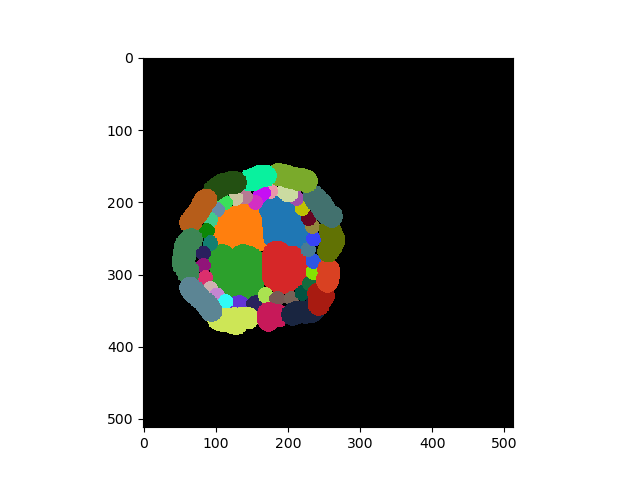

In [2]:
oversegmented = cle.asarray(imread('../../data/syntetic_cells.tif')).astype(np.uint32)
oversegmented

此外，我们需要一个注释，其中像素强度 = 1 表示应该合并标签。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
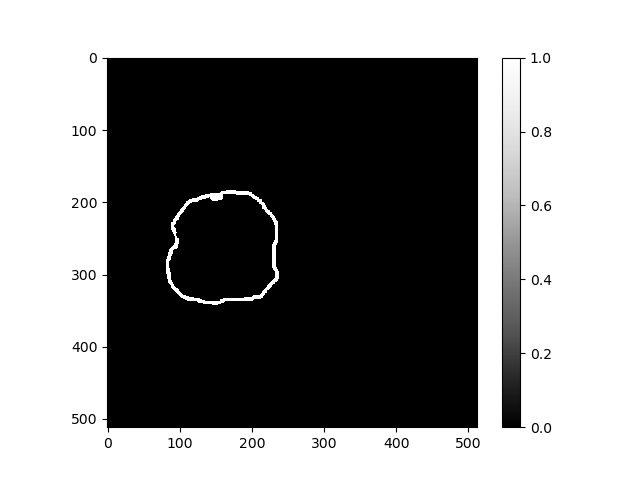
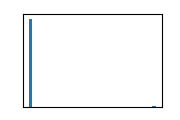

In [3]:
annotation = cle.asarray(imread('../../data/syntetic_cells_merge_annotation.tif')).astype(np.uint32)

# binarize the image
annotation = annotation == 1

annotation

为了可视化，我们将两者叠加。

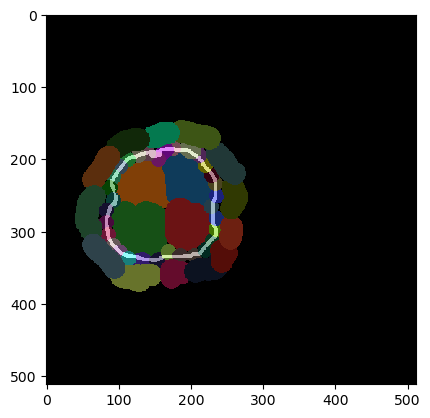

In [4]:
cle.imshow(oversegmented, labels=True, continue_drawing=True)
cle.imshow(annotation, alpha=0.5)

现在我们可以合并所有边界被注释的细胞。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
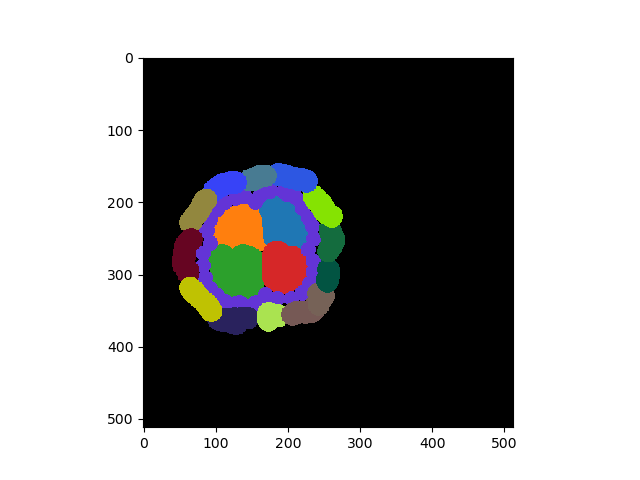

In [5]:
result = cle.merge_annotated_touching_labels(oversegmented, annotation)
result

## 它是如何工作的？
在底层，有一个函数用于从标签图像和注释生成接触矩阵，还有一个函数用于根据接触矩阵合并标签。

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
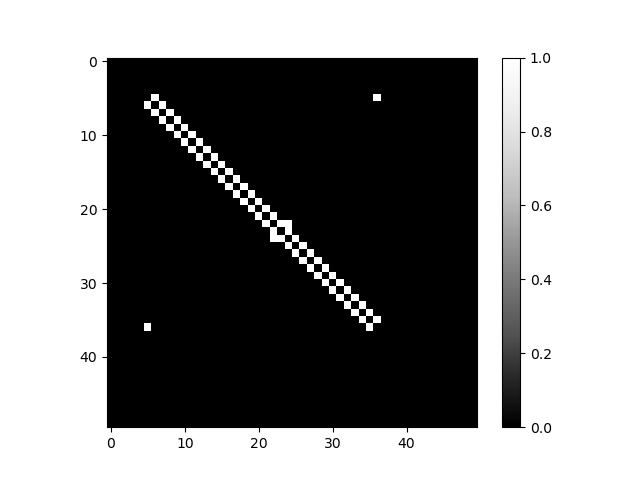
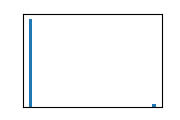

In [6]:
should_touch_matrix = cle.generate_should_touch_matrix(oversegmented, annotation)
should_touch_matrix

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
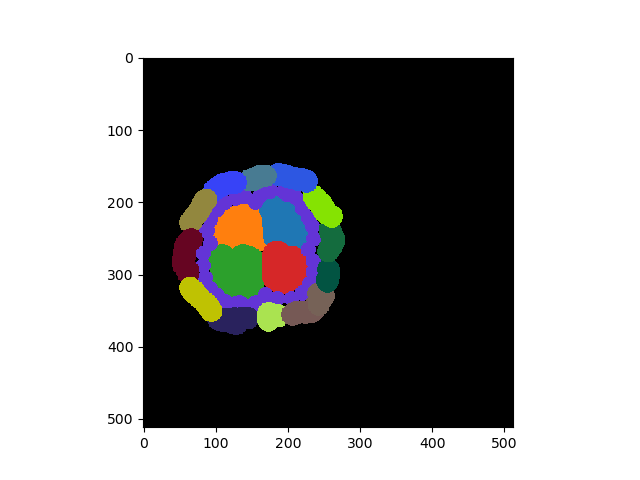

In [7]:
result = cle.merge_labels_according_to_touch_matrix(oversegmented, should_touch_matrix)
result